[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/herovired-content/Pandas/HEAD?labpath=Pandas%20_Carprice.ipynb)

# Carprice Dataset EDA

## Feedback from the learners
1. Plugging missing data ( rules & code)
2. Feature engineering - creating new derived variables- ( rules & code). How to use EM algo for the same.
3. Correlation matrix , VIF & intution
4. Which variable to drop & why. ( rule  & code)
5. Outlier treatment
6. How to make use of probability distribution charts to draw data insights and apply those concepts in EDA
7. Extracting critical variables from data and How to arrive at final dataset before ML algorithm is applied
Actually Guarav sir has just touched few EDA steps but not taught us in detail.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('dataset/CarPrice_Assignment_train_unclean.csv')

In [238]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0
5,0,peugeot 604sl,gas,turbo,four,sedan,rwd,NaN,108.0,186.7,68.3,56.0,3130.0,l,four,134,mpfi,3.61,3.21,7.0,142,5600.0,18.0,24.0,18150.0
6,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340.0,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200.0,26.0,32.0,9960.0
7,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800.0,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900.0,17.0,25.0,37028.0
8,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,NaN,55.5,3062.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,19.0,25.0,22625.0
9,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2275.0,ohc,four,110,idi,3.27,3.35,22.5,56,4500.0,NaN,47.0,7788.0


In [151]:
pd.options.display.max_columns = None

In [152]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         153 non-null    int64  
 1   CarName           153 non-null    object 
 2   fueltype          150 non-null    object 
 3   aspiration        151 non-null    object 
 4   doornumber        152 non-null    object 
 5   carbody           153 non-null    object 
 6   drivewheel        153 non-null    object 
 7   enginelocation    142 non-null    object 
 8   wheelbase         151 non-null    float64
 9   carlength         150 non-null    float64
 10  carwidth          149 non-null    float64
 11  carheight         151 non-null    float64
 12  curbweight        152 non-null    float64
 13  enginetype        153 non-null    object 
 14  cylindernumber    152 non-null    object 
 15  enginesize        153 non-null    int64  
 16  fuelsystem        153 non-null    object 
 1

In [154]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,153.000000,151.000000,150.000000,149.000000,151.000000,152.000000,153.000000,151.000000,150.000000,151.000000,153.000000,146.000000,150.000000,150.000000,153.000000
mean,0.790850,98.970199,174.342667,65.997987,53.774172,2574.019737,127.647059,3.342185,3.267167,10.217351,102.888889,5096.232877,25.360000,30.960000,13364.157954
std,1.259979,6.384991,12.971747,2.077826,2.493791,541.390991,42.015265,0.266828,0.310188,4.110621,37.950895,456.186804,6.794471,7.259227,8302.558158
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.925000,64.200000,52.000000,2143.750000,97.000000,3.140000,3.127500,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.600000,54.100000,2434.000000,120.000000,3.350000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10698.000000
75%,2.000000,102.800000,184.600000,67.200000,55.700000,3036.000000,145.000000,3.595000,3.410000,9.405000,116.000000,5400.000000,30.000000,36.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,207.000000,6000.000000,49.000000,54.000000,45400.000000


In [155]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

## Missing data

In [158]:
df.isna()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [159]:
df.isna().sum()

symboling            0
CarName              0
fueltype             3
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
dtype: int64

<AxesSubplot:>

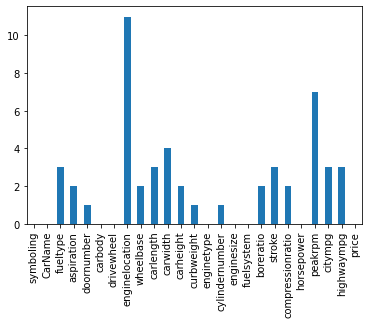

In [162]:
df.isna().sum().plot(kind='bar')

In [172]:
df['CarName'].unique()

array(['audi 100 ls', 'peugeot 504', 'mitsubishi outlander',
       'toyota corona', 'toyota cressida', 'peugeot 604sl', 'subaru baja',
       'porsche boxter', 'volvo 264gl', 'toyota corolla',
       'volvo 145e (sw)', 'maxda glc deluxe', 'jaguar xj', 'mazda 626',
       'bmw x3', 'volkswagen dasher', 'audi 5000',
       'peugeot 505s turbo diesel', 'mazda rx-4', 'nissan teana',
       'nissan titan', 'honda civic cvcc', 'honda accord cvcc', 'subaru',
       'bmw 320i', 'honda civic (auto)', 'nissan note',
       'mitsubishi montero', 'alfa-romero stelvio', 'toyota mark ii',
       'volkswagen 411 (sw)', 'toyota corona liftback',
       'mitsubishi mirage', 'mitsubishi lancer', 'porsche cayenne',
       'bmw z4', 'volvo 245', 'dodge coronet custom (sw)',
       'porcshce panamera', 'dodge coronet custom', 'volvo 244dl',
       'mitsubishi g4', 'audi 5000s (diesel)', 'vokswagen rabbit',
       'toyouta tercel', 'mitsubishi mirage g4', 'buick century special',
       'mazda glc', 'maxda

In [186]:
df.isna().sum(axis=1).replace([0,1],[False,True])

0      False
1      False
2      False
3      False
4       True
       ...  
148     True
149    False
150     True
151    False
152    False
Length: 153, dtype: object

In [198]:
df['CarName'].unique()

array(['audi 100 ls', 'peugeot 504', 'mitsubishi outlander',
       'toyota corona', 'toyota cressida', 'peugeot 604sl', 'subaru baja',
       'porsche boxter', 'volvo 264gl', 'toyota corolla',
       'volvo 145e (sw)', 'maxda glc deluxe', 'jaguar xj', 'mazda 626',
       'bmw x3', 'volkswagen dasher', 'audi 5000',
       'peugeot 505s turbo diesel', 'mazda rx-4', 'nissan teana',
       'nissan titan', 'honda civic cvcc', 'honda accord cvcc', 'subaru',
       'bmw 320i', 'honda civic (auto)', 'nissan note',
       'mitsubishi montero', 'alfa-romero stelvio', 'toyota mark ii',
       'volkswagen 411 (sw)', 'toyota corona liftback',
       'mitsubishi mirage', 'mitsubishi lancer', 'porsche cayenne',
       'bmw z4', 'volvo 245', 'dodge coronet custom (sw)',
       'porcshce panamera', 'dodge coronet custom', 'volvo 244dl',
       'mitsubishi g4', 'audi 5000s (diesel)', 'vokswagen rabbit',
       'toyouta tercel', 'mitsubishi mirage g4', 'buick century special',
       'mazda glc', 'maxda

In [229]:
df[df['CarName'] == 'peugeot 504'].isna().sum(axis=1).sum()

6

In [232]:
temp = []
for i in df['CarName'].unique():
    print(df[df['CarName'] == i].isna().sum(axis=1).sum())
    temp.append(i)

0
6
0
1
1
1
0
0
2
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
4
0
1
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
2
0
1
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
0
2
1
2
0
0
0
0
1
0
0
0
0
1
1
0
0
1
0
1
0


In [233]:
temp

['audi 100 ls',
 'peugeot 504',
 'mitsubishi outlander',
 'toyota corona',
 'toyota cressida',
 'peugeot 604sl',
 'subaru baja',
 'porsche boxter',
 'volvo 264gl',
 'toyota corolla',
 'volvo 145e (sw)',
 'maxda glc deluxe',
 'jaguar xj',
 'mazda 626',
 'bmw x3',
 'volkswagen dasher',
 'audi 5000',
 'peugeot 505s turbo diesel',
 'mazda rx-4',
 'nissan teana',
 'nissan titan',
 'honda civic cvcc',
 'honda accord cvcc',
 'subaru',
 'bmw 320i',
 'honda civic (auto)',
 'nissan note',
 'mitsubishi montero',
 'alfa-romero stelvio',
 'toyota mark ii',
 'volkswagen 411 (sw)',
 'toyota corona liftback',
 'mitsubishi mirage',
 'mitsubishi lancer',
 'porsche cayenne',
 'bmw z4',
 'volvo 245',
 'dodge coronet custom (sw)',
 'porcshce panamera',
 'dodge coronet custom',
 'volvo 244dl',
 'mitsubishi g4',
 'audi 5000s (diesel)',
 'vokswagen rabbit',
 'toyouta tercel',
 'mitsubishi mirage g4',
 'buick century special',
 'mazda glc',
 'maxda rx3',
 'chevrolet vega 2300',
 'dodge d200',
 'subaru dl',
 'n

In [236]:
df[df['CarName'] == 'toyota corona']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
101,1,toyota corona,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2204.0,ohc,four,98,2bbl,3.19,NaN,9.0,70,4800.0,29.0,34.0,8238.0
115,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016.0,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200.0,19.0,24.0,15998.0
122,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2275.0,ohc,four,110,idi,3.27,3.35,22.5,56,4500.0,34.0,36.0,7898.0


In [171]:
df[df['CarName'] == 'audi 100 ls']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500.0,24.0,30.0,13950.0


<AxesSubplot:>

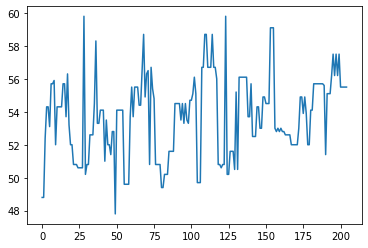

In [27]:
df['carheight'].plot()

<AxesSubplot:>

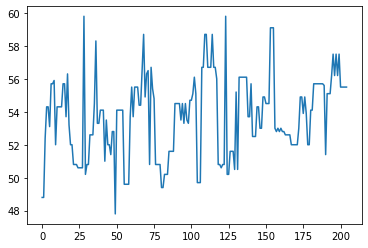

In [30]:
df['carheight'].plot()

(array([ 3.,  9., 28., 25., 33., 41., 38., 15.,  4.,  9.]),
 array([47.8, 49. , 50.2, 51.4, 52.6, 53.8, 55. , 56.2, 57.4, 58.6, 59.8]),
 <BarContainer object of 10 artists>)

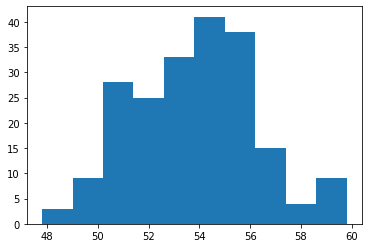

In [32]:
plt.hist(df['carheight'],bins=10)

<AxesSubplot:ylabel='Density'>

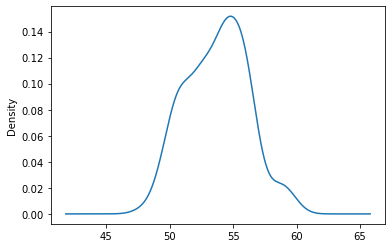

In [26]:
df['carheight'].plot.density()

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


In [34]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


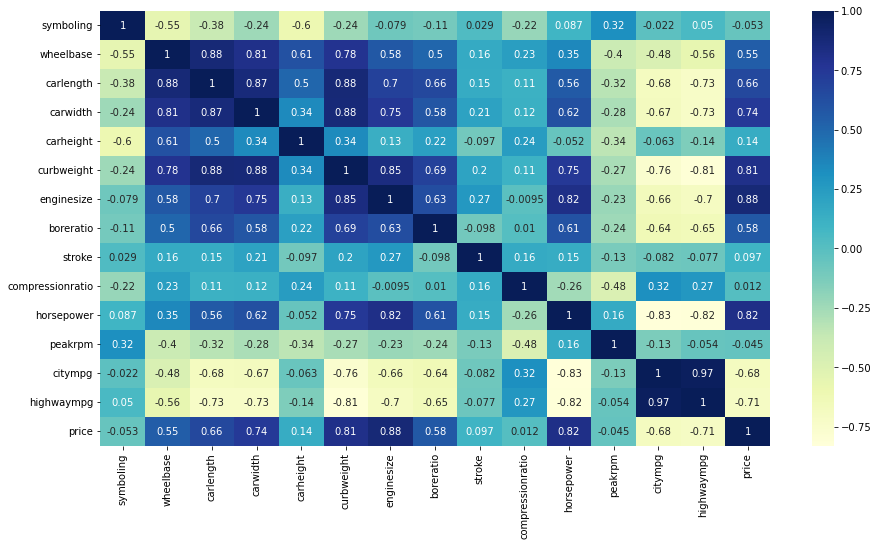

In [239]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

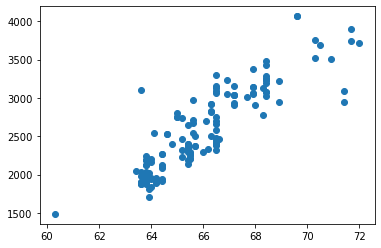

In [243]:
# df[['horsepower','enginesize']].plot(kind='scatter')
plt.scatter(df['carwidth'],df['curbweight'])

<AxesSubplot:>

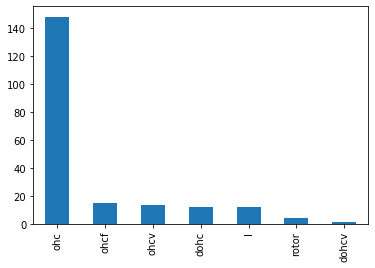

In [59]:
df['enginetype'].value_counts().plot(kind='bar')

In [237]:
import pandas as pd
from scipy.stats import pointbiserialr


In [105]:
df_temp = df.copy()

In [106]:
df_temp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_temp['enginetype'] = labelencoder.fit_transform(df_temp['enginetype'])
df_temp

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,0,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,0,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,5,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,3,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,3,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,3,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,3,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,5,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,3,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [109]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [111]:
# get continuous and dichotomous data
grades = df_temp['enginetype']
question_1 = df_temp['price']

In [131]:
# pbc of first question
pbc = pointbiserialr(question_1, grades)
print(pbc)

PointbiserialrResult(correlation=0.04917160739797437, pvalue=0.48383426199090607)


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    object  
 3   fueltype          205 non-null    object  
 4   aspiration        205 non-null    object  
 5   doornumber        205 non-null    object  
 6   carbody           205 non-null    object  
 7   drivewheel        205 non-null    object  
 8   enginelocation    205 non-null    object  
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    object  
 16  enginesize        205 non-

In [135]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [139]:
df[['symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']].var()

symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382171e+07
dtype: float64

In [143]:
df[['symboling','wheelbase','enginetype',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']].groupby('enginetype').var()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginetype,,,,,,,,,,,,,,,
dohc,2.628788,65.009697,130.261818,4.181818,5.315152,346015.606061,2910.606061,0.024861,0.226533,0.200000,691.272727,383409.090909,11.636364,10.696970,6.342459e+07
dohcv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l,0.333333,48.746970,243.078788,5.456061,2.224545,269489.174242,699.537879,0.050879,0.231863,42.669318,402.454545,266571.969697,67.000000,73.242424,1.349533e+07
ohc,1.402648,22.401616,128.475023,3.659431,5.271015,193901.465481,726.454128,0.067666,0.056135,17.169664,869.249862,187632.262364,37.505562,40.355948,4.106035e+07
ohcf,1.714286,9.598286,38.149524,0.526857,1.711714,60163.123810,1302.980952,0.002469,0.018895,0.341238,2648.400000,274285.714286,21.695238,18.114286,1.194753e+08
ohcv,2.025641,84.827436,147.895769,5.198590,10.093077,147542.858974,3520.397436,0.072109,0.039147,0.858590,1077.269231,92660.256410,4.358974,13.858974,1.309405e+08
rotor,0.000000,0.000000,0.000000,0.000000,0.000000,3506.250000,25.000000,0.000000,0.000000,0.000000,289.000000,0.000000,0.250000,0.000000,4.322500e+06


In [144]:
df.groupby('enginetype').count()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginetype,,,,,,,,,,,,,,,,,,,,,,,,,
dohc,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
dohcv,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
l,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
ohc,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
ohcf,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
ohcv,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
rotor,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
